# Diabetes Prediction

# 데이터 소개

**Pima Indians Diabetes Database**

TASK : 환자가 당뇨병을 가지고 있는지 분류(Classification)

csv 파일의 컬럼은 아래와 같습니다.
- Pregnancies : 임신한 횟수
- Glucose : 글루코스 수치
- Blood Pressure : 혈압
- SkinThickness : 삼두의 피부 두께
- Insulin : 인슐린 수치
- BMI : BMI 지수
- DiabetesPedigreeFunction : 가족력 수치
- Age : 나이
- Outcome : 당뇨병 유무 (1 또는 0)


# Q1. Task 에 따른 Train Data와 Target Data는 무엇이 되어야 할지 정의해보시오.

In [ ]:
# train data :
# 각 환자의 건강 상태를 파악할 수 있는 데이터와,해당 환자의 당뇨병 유무에 대한 데이터를 담고 있어야 한다.
# 이때, 해당 데이터는 당뇨병 증상, 환자의 특징을 반영할 수 있어야 한다.
# 환자의 나이, 혈당 수치, 혈압, BMI 등이 포함될 수 있다.

# test data :
# Train Data를 투입해 훈련된 모델을 바탕으로, 해당 모델이 당뇨병 여부를 얼마나 정확하게 파악할 수 있는지에
# 대한 성능을 평가해야 한다. 따라서, 해당 환자가 당뇨병이 있는지(1) 없는지(0) 여부를 포함한다.

# Settings

In [7]:
# 구글 드라이브에 코랩을 연동합니다.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# `os`는 파일경로를 관리해주는 라이브러리 입니다.
# 파일경로 관리를 os 라이브러리를 통해 효율적으로 관리할 수 있습니다.
import os
print(os.getcwd()) # get current working directory
os.chdir("/content/drive/MyDrive/KUBIC-ML/W1") # change directory
print(os.getcwd())

/content/drive/My Drive/KUBIC-ML/W1
/content/drive/MyDrive/KUBIC-ML/W1


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [10]:
data = pd.read_csv("diabetes.csv")
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']
for i in col:
  data[i].replace(0,data[i].mean(),inplace=True)

# EDA(Exploratory Data Analysis)

처음 데이터(raw data)에서 데이터를 확인하고 분석 및 출력(시각화)하면서 인사이트를 얻어내는 과정.

# Q2. 데이터를 불러온 후에 개요를 살펴보기 위해 다음 메소드를 사용합니다.

# 각 메소드를 사용해보고 어떤 정보를 알 수 있는지 정리해보세요.

In [ ]:
# 데이터 불러오기
# data = pd.read_csv("diabetes.csv")

In [11]:
# head() : dataframe의 첫 row들을 출력한다. default는 5개.
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
# info() : column을 기준으로 dataframe의 정보를 출력한다. column의 이름, Non-null 갯수, 데이터타입 정보를 포함.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
# describe() :데이터프레임의 기술 통계량을 제공. 각 column 별로, 숫자형 데이터에 대한 평균, 표준편차, 최댓값, 최솟값, 25%, 50%, 75% 백분위수 등을 보여준다.
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# data.shape : 데이터프레임의 row, column 개수를 튜플 형태로 반환한다.
data.shape

(768, 9)

# Q3. 모든 ML패키지가 결측치를 자동으로 처리하지 않습니다. 결측치 존재 여부를 확인해보세요.

결측치가 존재한다면, 이를 처리하는 방법에 대해 알아보고 처리해보세요.

해당 과제에서 결측치를 처리한 방법이 올바른 방법인지 검토해보세요.

결측치는 판단에 따라 drop 할 수 있고, 특정 값으로 채울 수 있습니다.

데이터를 채우는 방법으로는 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts() 등으로 처리합니다.

In [ ]:
# 결측치 존재 여부 확인
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# 결측치 처리

# 수치형 데이터

# 1. drop
# ex: df.dropna() => 모든 결측값이 있는 행이 삭제된 데이터프레임을 반환

# 2. 평균, 중앙값으로 대체
# 평균: data.fillna(df.mean())
# 중앙: df.fillna(df.median())

# 3. 중앙값으로 대체
# ex: 0으로 대체
# data.fillna(0)

# 4. 이웃 값 활용
# fillna()의 method 매개변수를 이용하여 이전 값이나 다음 값으로 결측값을 채울 수 있습니다.
# ex: df.fillna(method='ffill') => 이전 값으로 결측값을 대체

# 범주형 데이터

# 1. unique()
# 해당 열의 고유한 값을 배열 형태로 반환한다.
# 중복되지 않은 고유한 값들을 확인 가능.

# 2. value_counts()
# 해당 열의 각 값의 등장 횟수를 반환한다.
# 범주형 데이터에서 각 범주가 얼마나 자주 등장하는지 확인 가능.
# index value 형태로 나온다.
# index가 해당 값이고, 해당 값의 등장 횟수가 value로 나온다.
# ex)
# 여자    3
# 남자    2
# Name: 성별, dtype: int64

# Q4. 결측치가 존재하는 경우, 다양한 보간법에 대하여 정리하고, 그에 대한 코드를 작성해보세요.

In [ ]:
# 1. Linear Interpolation (선형 보간)
# 두 점을 연결하는 직선의 방정식을 사용하여 결측값을 추정
# 데이터프레임의 인접한 두 행의 값을 이용하여 그 사이의 결측값을 직선으로 연결
# 데이터가 선형적인 패턴을 따를 때 유용

linear_interpolated = data.interpolate(method='linear')

print("Linear Interpolation :\n", linear_interpolated)

선형 보간 결과:
      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                 

In [ ]:
# 2. Polynomial Interpolation (다항식 보간)

# 데이터를 가장 잘 표현하는 다항식을 찾아 결측값을 추정
# 일반적으로 1차 (선형) 또는 2차 (이차) 다항식을 사용
# 더 복잡한 패턴을 반영 가능

# order는 다항식의 차수.
poly_interpolated = data.interpolate(method='polynomial', order=2)

print("Polynomial Interpolation:\n", poly_interpolated)

다항식 보간 결과:
      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                

In [ ]:
# Time-based Linear Interpolation (시간에 따른 선형 보간)

# 시계열 데이터에서 자주 사용되는 방법으로, 시간의 흐름에 따라 선형 보간을 수행.
# 데이터프레임의 인덱스가 Dateime 인 경우 사용.
# 시간적 패턴을 고려할 때 유용

# time_interpolated = data.interpolate(method='time')


# print("Time-based Linear Interpolation:\n", time_interpolated)

# Data Visualization

데이터 시각화는 데이터에 대한 직관적인 이해와 인사이트 도출을 위해 필수적입니다.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

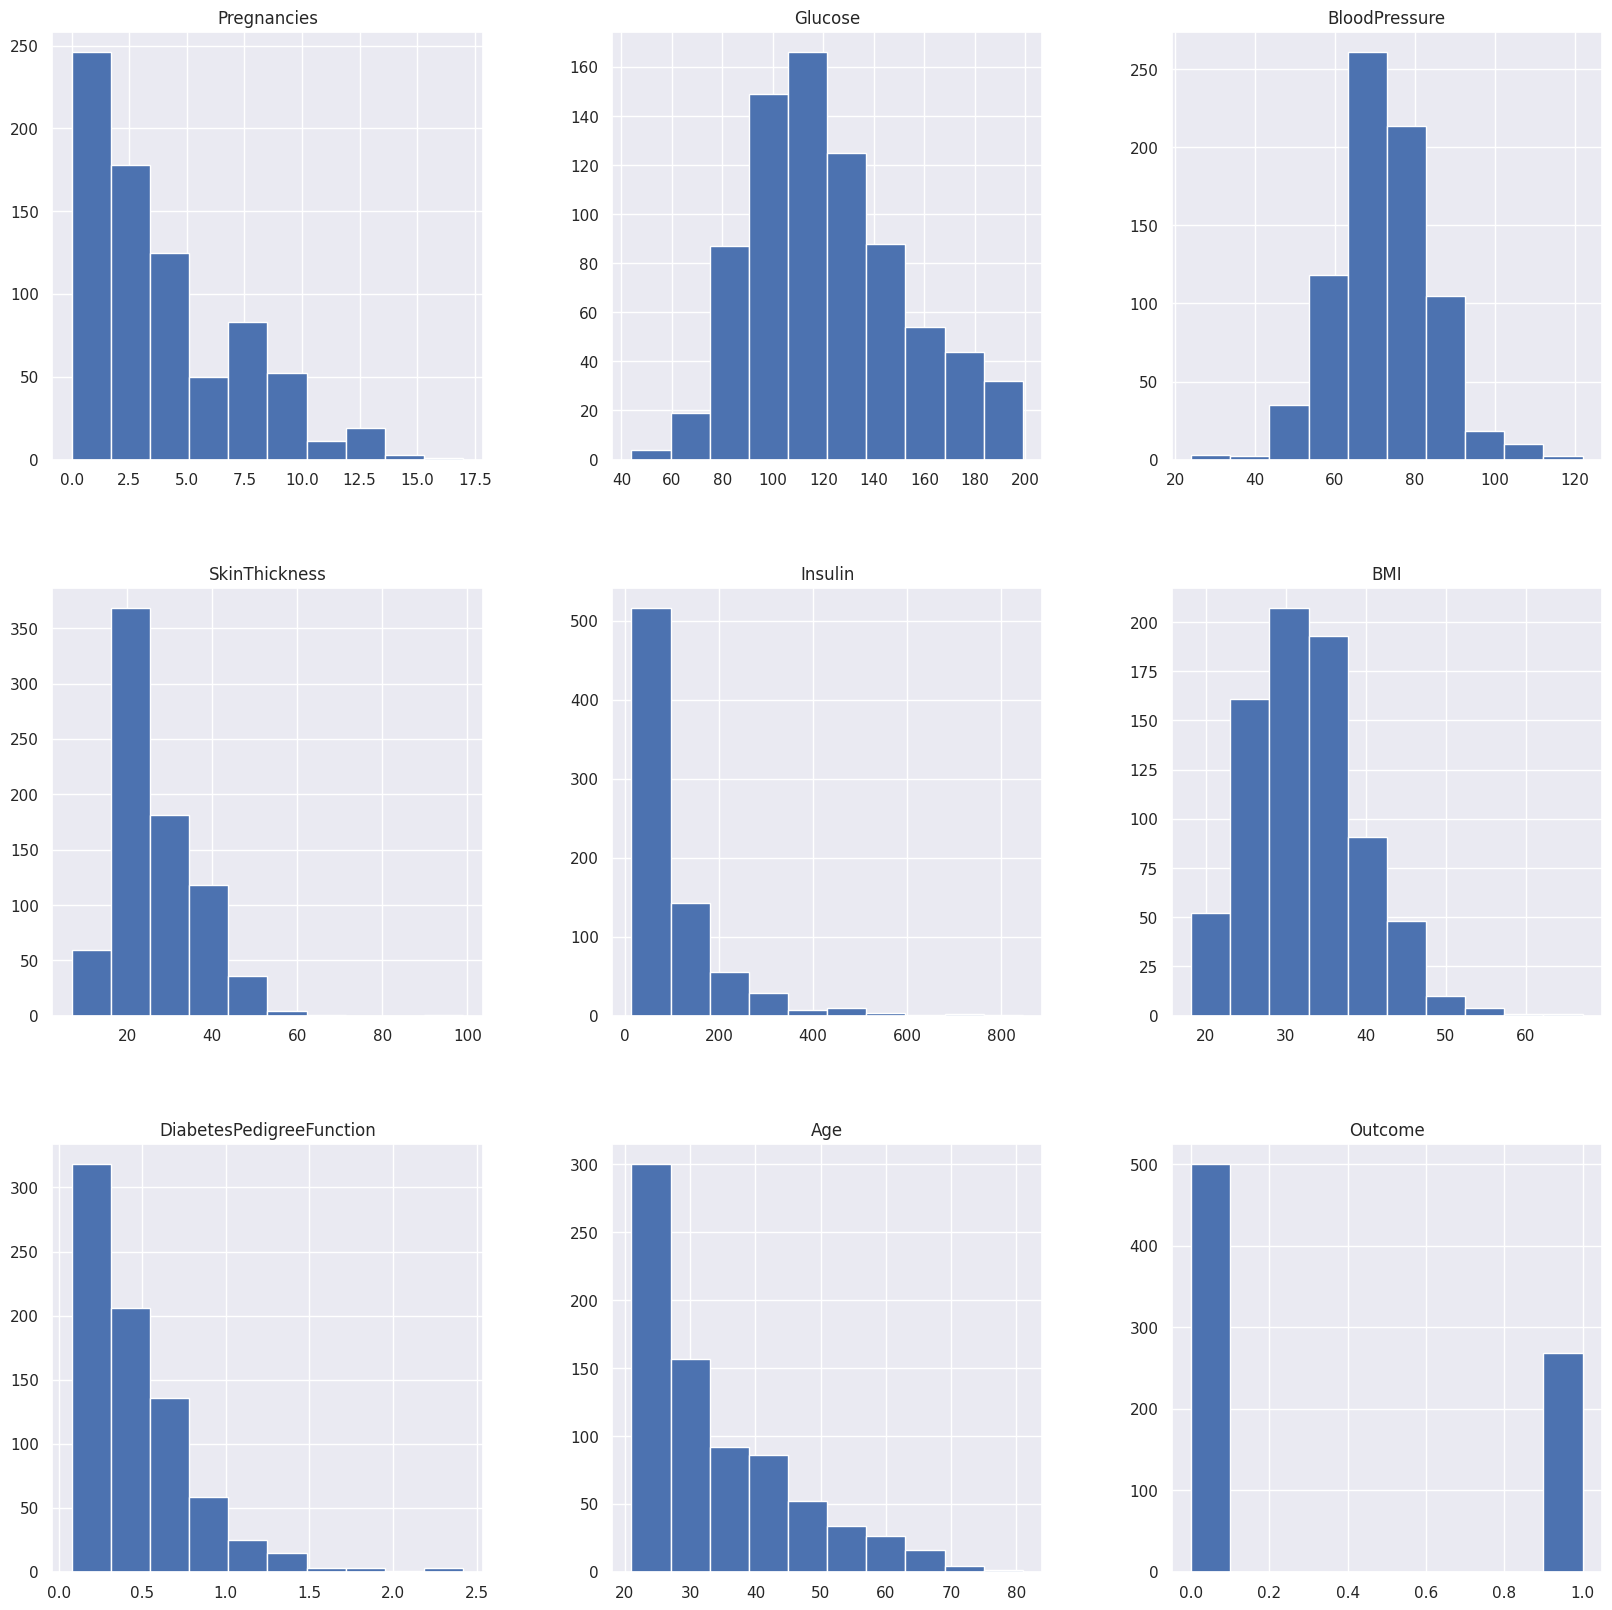

In [ ]:
data.hist(figsize = (20,20))

# Q5. correlation plot을 그리고, 해당 plot에서 얻은 인사이트를 정리해보세요.

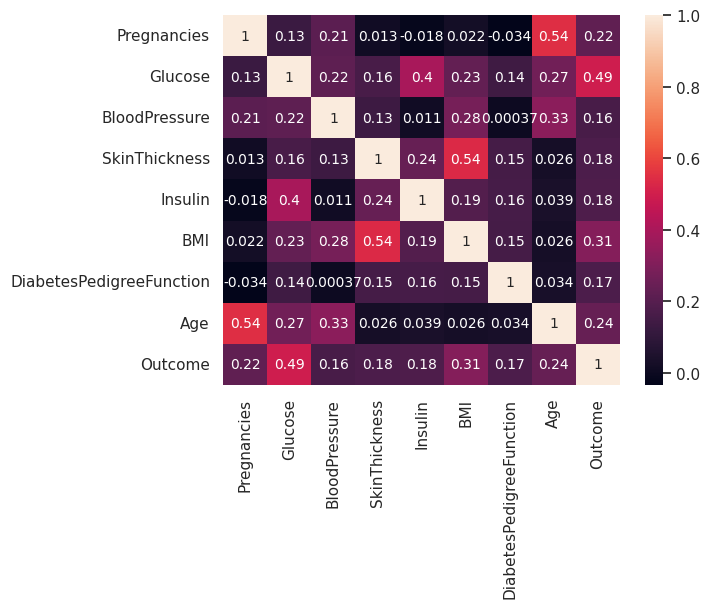

In [ ]:
# 상관관계 plot

# correlation 계산
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2g", annot_kws={"size": 10})
plt.show()

# 1. Age, Pregnacies  -> 0.54
# 나이와 임신 횟수가 연관도가 높게 나온 상태.
# 임신 횟수, 나이가 당뇨병에 영향을 줄 수는 있어 보이나, 두 변수 간 연관성을 짓기는 어려워보임.

# 2. SkinThickness, BMI -> 0.54
# 체지방 량이 높을수록, 피부 두께도 증가하는 것은 맞음.
# 비만도가 당뇨랑 관련이 있는 것은 맞으나, 해당 correlation 결과로만 판단하는 것은 비약으로 보인다.

# 3. Outcome, Glucose -> 0.49
# 당뇨병 여부와 글루코스 수치가 비교적 높은 correlation으로 계산
# 글루코스 수치 자체가 당뇨병 여부가 깊은 관련이 있는 것은 맞으나, 이것만으로 Train 할 수는 없어 보인다.

# 4. Glucose, Insulin -> 0.4
# 인슐린 수치가 글루코스 수치에 영향을 주므로, 연관성이 높다고 판단. 당뇨병 판단 여부에도 중요한 수치로 보임
# 다만, 해당 계산에서는 0.4로 비교적 낮게 나온 상태

# 전체적으로, correlation이 0.5, 0.4 대를 넘지 않음.
# 수치만을 보고 correlation을 비교하기 때문에, 실제로는 연관성이 크지 않은 수치 간 correlation이 높게 나올 수 있음.

<Axes: xlabel='Outcome', ylabel='Age'>

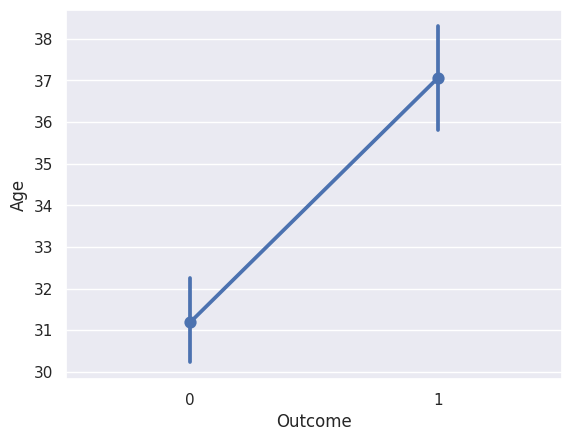

In [ ]:
sns.pointplot(x = "Outcome", y = "Age", data = data)

<Axes: >

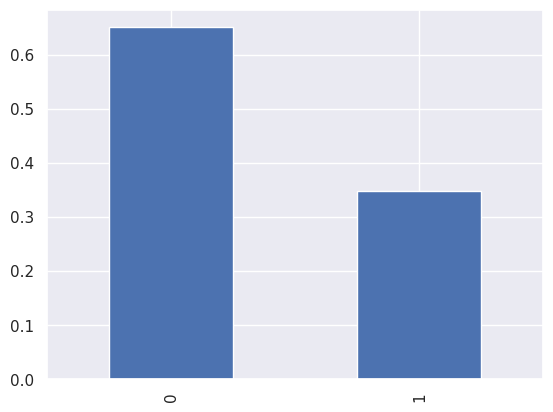

In [12]:
# Class imbalance 확인
data.Outcome.value_counts(normalize=True).plot(kind = "bar")

<Axes: xlabel='Age', ylabel='Insulin'>

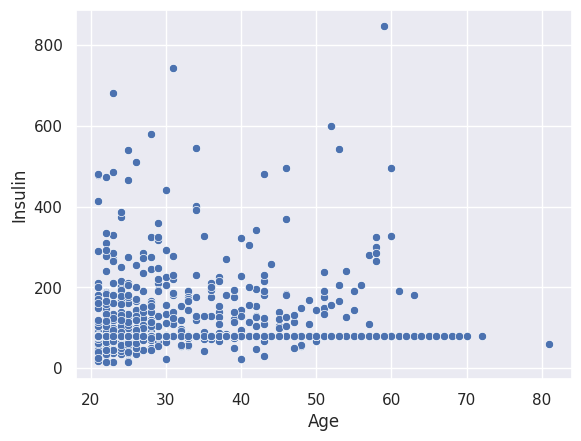

In [13]:
sns.scatterplot(x = "Age", y = "Insulin", data = data)

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='Pregnancies'>

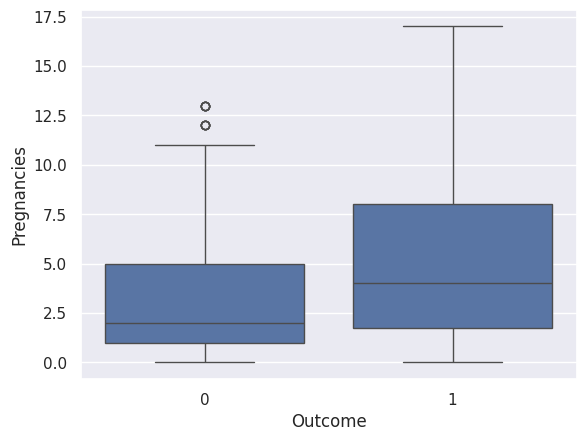

In [ ]:
sns.boxplot(x = "Outcome", y = "Pregnancies", data = data)

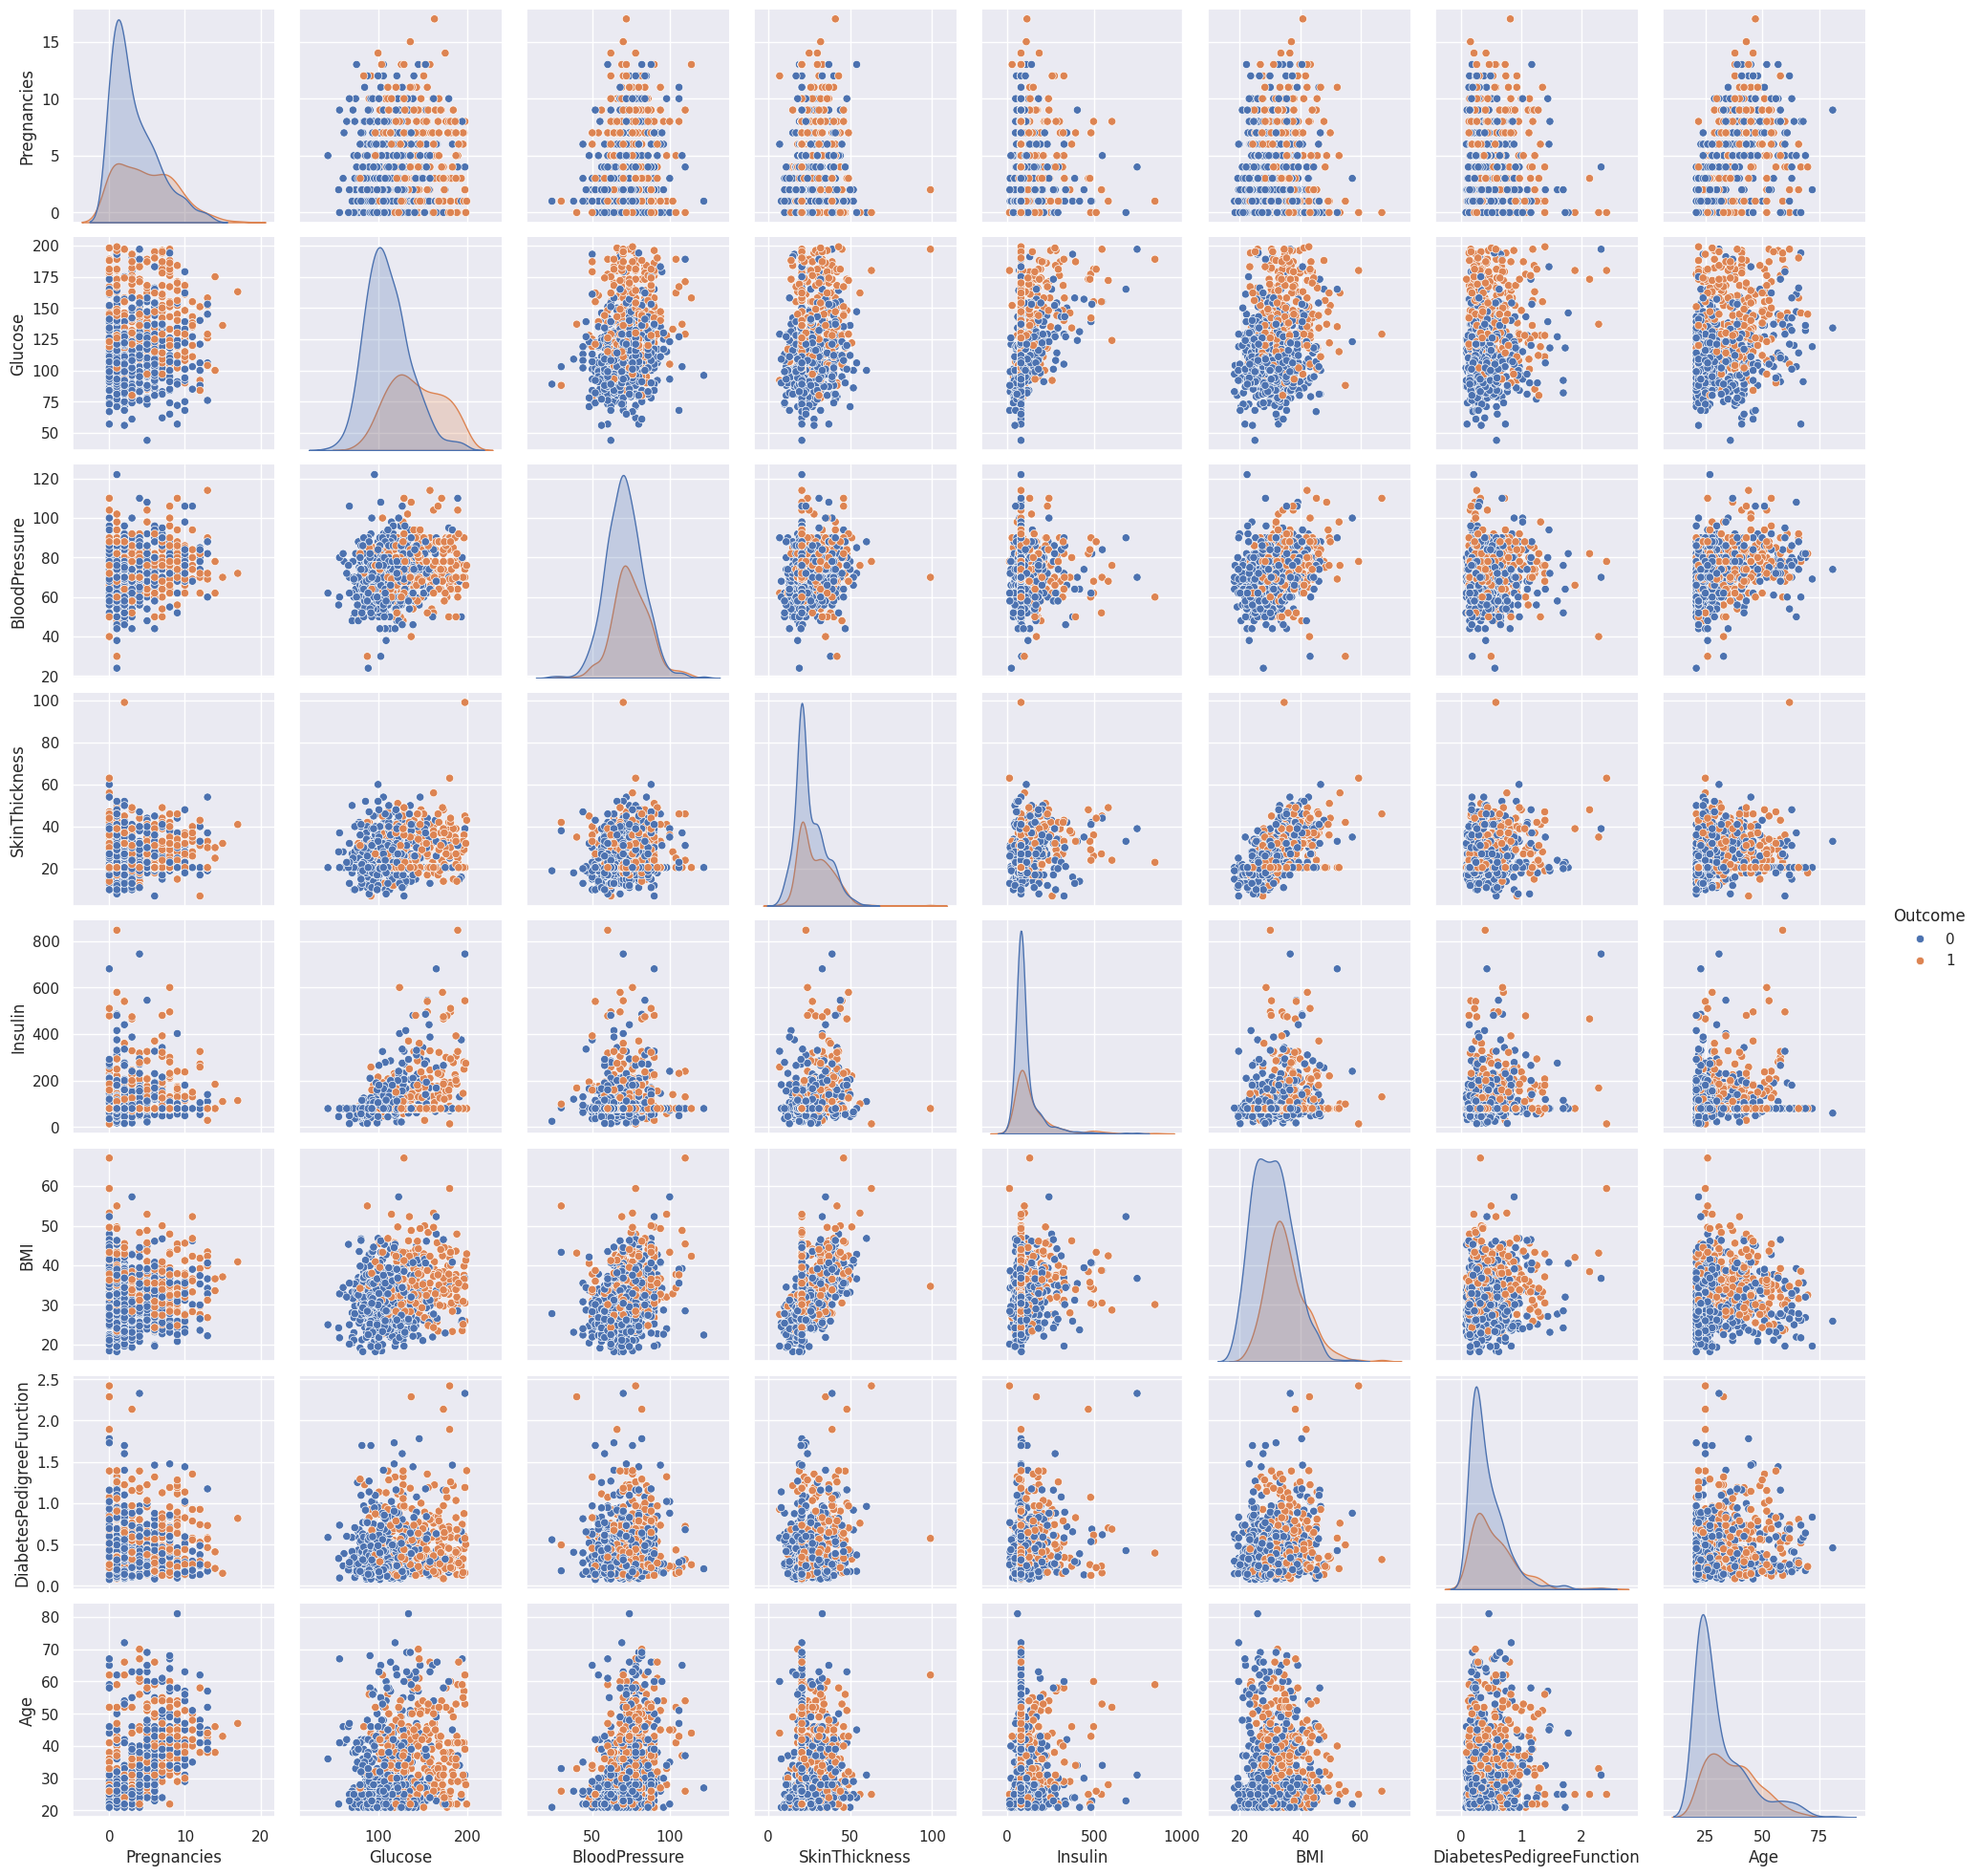

In [ ]:
sns.pairplot(data, hue = "Outcome")

<Axes: xlabel='Pregnancies', ylabel='Age'>

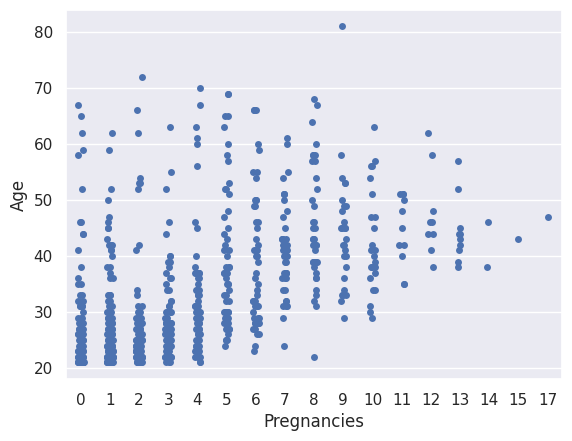

In [ ]:
sns.stripplot(x = "Pregnancies", y = "Age", data = data)

<Axes: xlabel='SkinThickness', ylabel='Insulin'>

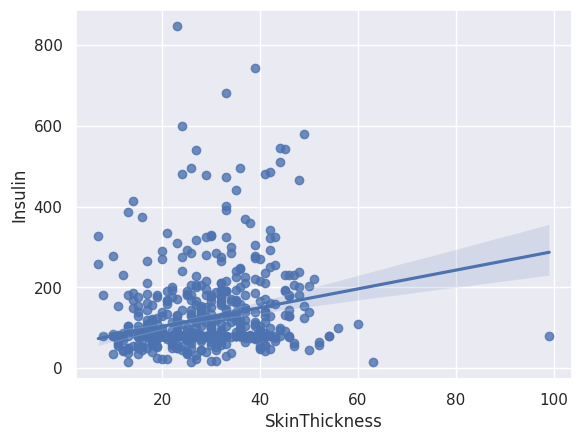

In [ ]:
sns.regplot(x = "SkinThickness", y = "Insulin", data = data)

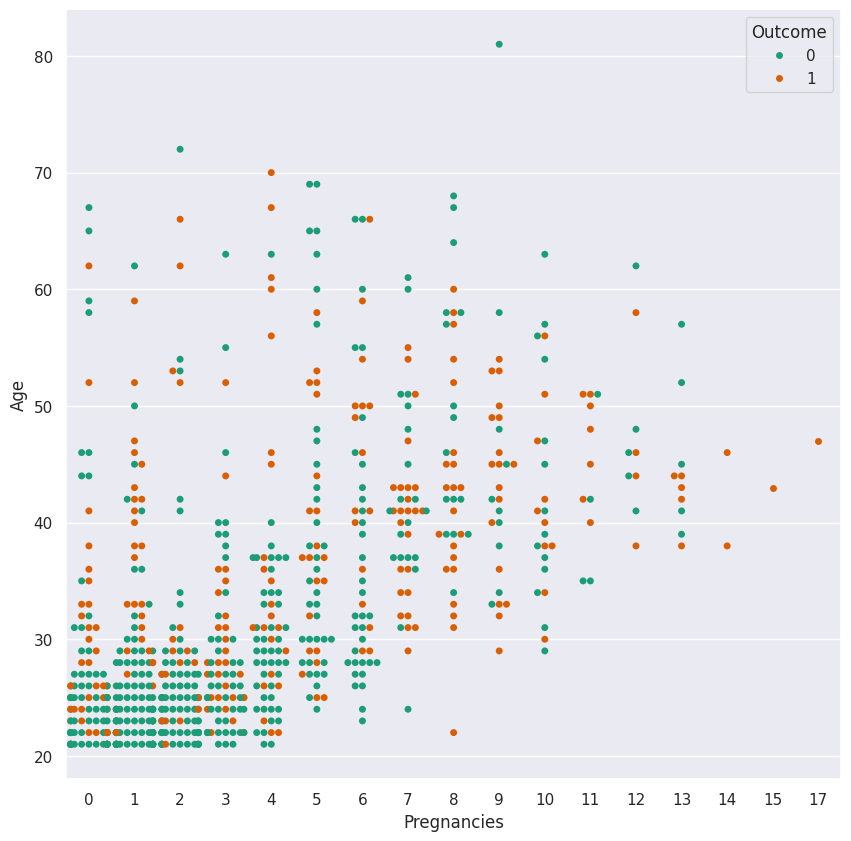

In [ ]:
f, ax = plt.subplots(figsize = (10, 10))
ax = sns.swarmplot(x = "Pregnancies", y = "Age", hue = "Outcome",
                   palette = "Dark2", data = data)
ax = sns.set(style = "darkgrid")

# Q6. 위에서 보여준 그래프들(혹은 본인이 그려본 그래프)로부터 한 그래프를 선정하여, 해당 그래프에서 어떤 정보를 얻을수 있는지 작성하세요.

In [ ]:
# 예시) Outcome에 따른 상대도수를 보면 class 0이 65%를 차지하는 것으로 보아
# class imbalance가 심하지 않음을 알 수 있다.
# 따라서 data augmentation이 필요하지 않다.(SMOTE, ADASYN)


In [13]:
# sns.boxplot(x = "Outcome", y = "Pregnancies", data = data)

# Outcome과 Pregnancies 간 분포를 시각화.

# "Outcome"이 0일 때 임신 횟수("Pregnancies")의 분포의 경우,
# 중앙값 약 2.3. 약 1에서 5 사이의 임신횟수를 가짐.

# Outcome"이 1일 때 임신 횟수("Pregnancies")의 분포의 경우,
# 중앙값 약 4. 약 2.4에서 7.6회의 임신횟수를 가짐.

# 당뇨병 여부에 따른 임신 횟수의 분포 차이를 보여줌. 임신 횟수가 많을 수록 당뇨병 여부가 나타날 확률이 높다고 볼 수 있음.

## 이상치 처리


<Axes: >

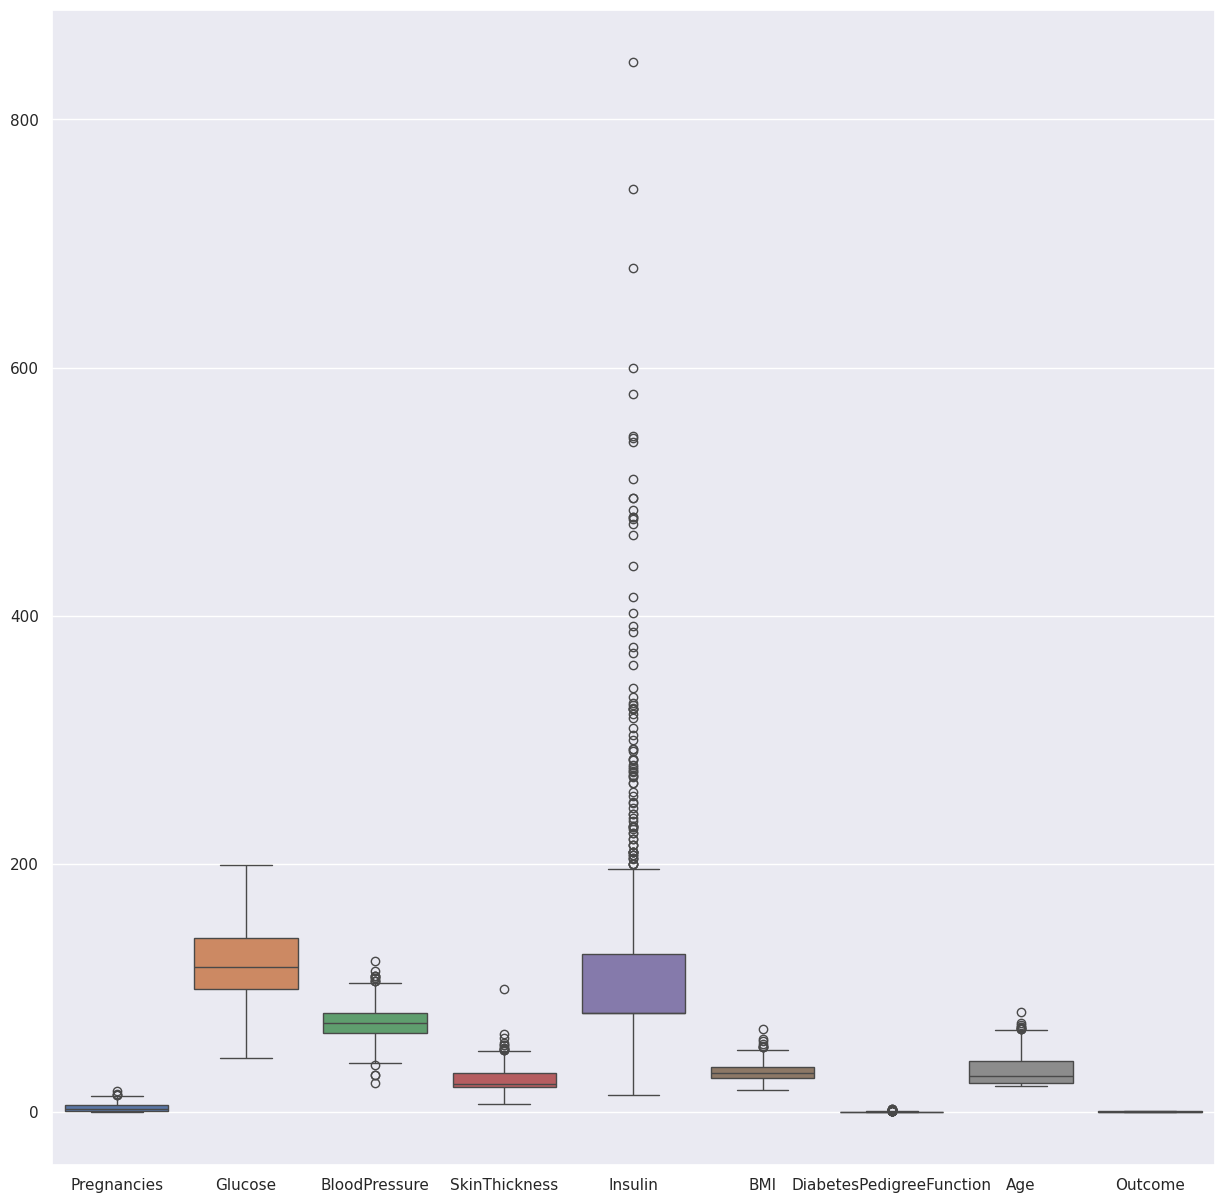

In [16]:
plt.figure(figsize = (15,15))
sns.boxplot(data = data)

`Insulin`에 대하여 심각한 이상치가 존재함을 알 수 있음

Quantile, drop등의 메소드를 사용해서 outlier를 제거할 수 있습니다.

기본적인 예시이므로 이렇게 해야한다가 아닌, 상황에 따라 다르게 하시면 됩니다.


<Axes: >

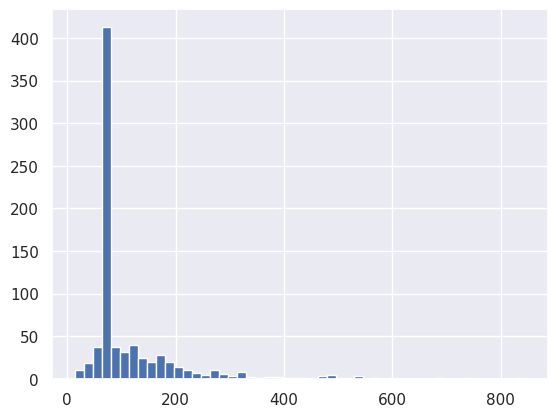

In [17]:
data["Insulin"].hist(bins = 50)

<Axes: >

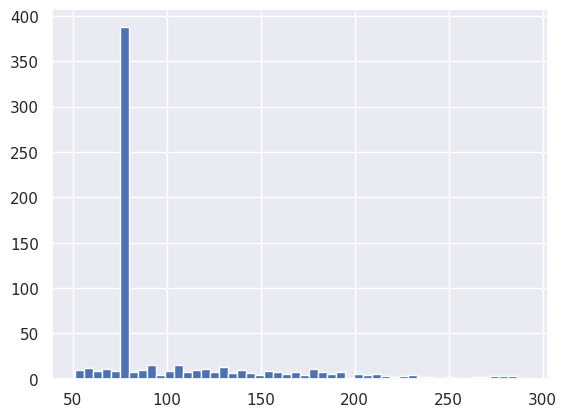

In [18]:
q95 = data["Insulin"].quantile(0.95)
q05 = data["Insulin"].quantile(0.05)

data = data[(data["Insulin"] < q95) & (data["Insulin"] > q05)]
data["Insulin"].hist(bins = 50)

## 정규화, 표준화

column간의 단위 차이를 조정해주는 역할

특정 컬럼의 단위 차이 때문에 output에 영향을 주는 것을 방지한다.

Scaling의 특징 때문에 범주형 변수에 대해서는 scaling이 불가능하다. 현재 코드에서는 범주형 변수가 없기 때문에 상관없지만, scaling을 해줄때는 범주형/수치형 변수를 나눠서 해줘야 한다. 당연히 target 변수는 제외해야 한다.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop(columns = ["Outcome"], axis = 1))
scaled_X = scaler.transform(data.drop(columns = ["Outcome"]))

In [20]:
X = pd.DataFrame(scaled_X, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.612652,0.922067,-0.041330,0.921135,-0.520121,0.170041,0.504418,1.391036
1,-0.857029,-1.245241,-0.542108,0.282844,-0.520121,-0.863711,-0.362568,-0.218846
2,1.200524,2.126127,-0.709034,-0.617524,-0.520121,-1.351051,0.645775,-0.134116
3,-0.857029,-1.107634,-0.542108,-0.355448,-0.227421,-0.642192,-0.940559,-1.066153
4,-1.150965,0.543648,-2.712144,0.921135,1.297863,1.572991,5.722043,-0.049385


In [21]:
y = data.Outcome

## Train/Test Split

Validation 을 위하여 Train Set내부에서 Train/Validation Set으로 split한다.

split은 random하게 이루어지며, validation set size를 portion으로 정할 수 있다.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Model Selction

현재 모델링에 대해 배운 상태가 아니라서 크게 신경쓰지 않아도 됩니다.

ML Pipeline에서 model selection 및 train 단계가 있다는 것을 배우기 위한 과정입니다.


# Q7. Classification model의 종류에 대해 검색해보고, 각각의 특징(장단점) 가볍게 정리해보기.

그 중 한개의 모델에 대해 각각의 특징(장단점)에 대하여 왜 이러한 장단점이 있는지 공부해보기

#### 1. 로지스틱 회귀 (Logistic Regression):

장점:
* 간단하고 해석하기 쉽다.

* 계산 비용이 낮아 대규모 데이터셋에 적합하다.

* 확률을 출력하여 클래스의 확률적 해석이 가능하다

단점:
* 선형 결정 경계만 학습할 수 있어서 복잡한 패턴을 처리하기 어렵다.

#### 2. 결정 트리 (Decision Trees):

장점:
* 비선형 결정 경계를 학습 가능

* 해석이 용이하며, 시각화가 간편하다.

단점:
* 과적합(Overfitting)이 발생할 수 있어, 가지치기 등의 조치가 필요하다.

* 데이터의 작은 변화에 민감하게 반응할 수 있다.

#### 3. 서포트 벡터 머신 (Support Vector Machine, SVM):

장점:
* 선형 및 비선형 결정 경계 모두 학습 가능.

* 마진 최적화를 통해 일반화 성능이 우수하다.

단점:

* 계산 비용이 크며, 대규모 데이터셋에 적합하지 않을 수 있다.

* 매개변수 튜닝이 필요하며, 커널 선택에 주의가 필요하다.


#### 4. K-최근접 이웃 (K-Nearest Neighbors, KNN):

장점:

* 모델 학습이 필요 없어 간단하게 구현 가능.

* 다양한 데이터 분포에 대응할 수 있다.

단점:

* 예측 시간이 오래 걸릴 수 있다.

* 특성의 스케일에 민감하며, 차원이 높아질수록 성능이 저하될 수 있다.



####  5. 랜덤 포레스트 (Random Forest):

장점:

* 과적합을 줄이고 성능을 향상시킨 의사결정 트리의 앙상블.

* 다양한 데이터 유형에 적용 가능. 높은 정확도

단점:

* 해석이 어려우며, 튜닝이 필요.

* 훈련시간이 길어질 수 있다.

# Q8. 위에서 선택한 한개의 모델(Logistic 제외)에 대하여 Train 진행해보기

In [ ]:
# 예시 코드 - Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

model = LogisticRegression(C=1, penalty = "l2")

# 선택된 모델 학습
model.fit(X_train, y_train)

# 학습된 모델로 예측
y_pred = model.predict(X_test)

# Validation Score 확인
log_acc = accuracy_score(y_test, model.predict(X_test))
log_cm = confusion_matrix(y_test, model.predict(X_test))

print("Accuracy:", log_acc)
print("Confusion Matrix:", log_cm)

Accuracy: 0.7608695652173914
Confusion Matrix: [[76  8]
 [25 29]]


In [ ]:
print("Train Set Accuracy : "+str(accuracy_score(y_train, model.predict(X_train))*100))
print("Validation Set Accuracy : "+str(accuracy_score(y_test, model.predict(X_test))*100))

Train Set Accuracy : 77.81818181818181
Validation Set Accuracy : 76.08695652173914


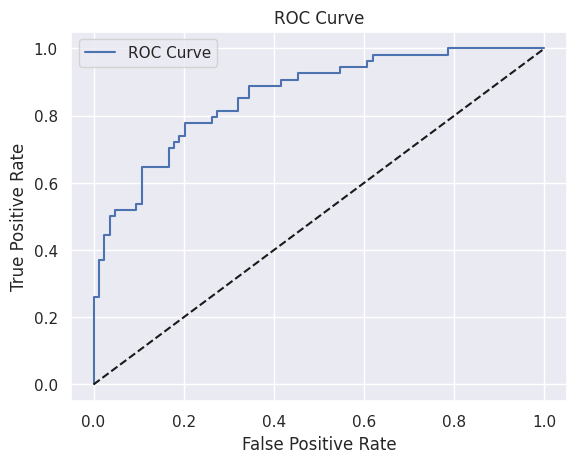

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Validation Set 에 대한 예측확률 계산
y_prob = model.predict_proba(X_test)[:,1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### Random Forest 적용

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

model_2 = RandomForestClassifier(n_estimators=100, random_state=42)  # 예시로 100개의 트리 사용

# 선택된 모델 학습
model_2.fit(X_train, y_train)

# 학습된 모델로 예측
y_pred = model_2.predict(X_test)

# Validation Score 확인
rf_acc = accuracy_score(y_test, model_2.predict(X_test))
rf_cm = confusion_matrix(y_test, model_2.predict(X_test))

print("Accuracy:", rf_acc)
print("Confusion Matrix:", rf_cm)

Accuracy: 0.7318840579710145
Confusion Matrix: [[73 11]
 [26 28]]


In [26]:
print("Train Set Accuracy : "+str(accuracy_score(y_train, model_2.predict(X_train))*100))
print("Validation Set Accuracy : "+str(accuracy_score(y_test, model_2.predict(X_test))*100))

# 과적합 되었다. Train accuracy는 증가했는데, Test accuracy는 감소함.

Train Set Accuracy : 100.0
Validation Set Accuracy : 73.18840579710145


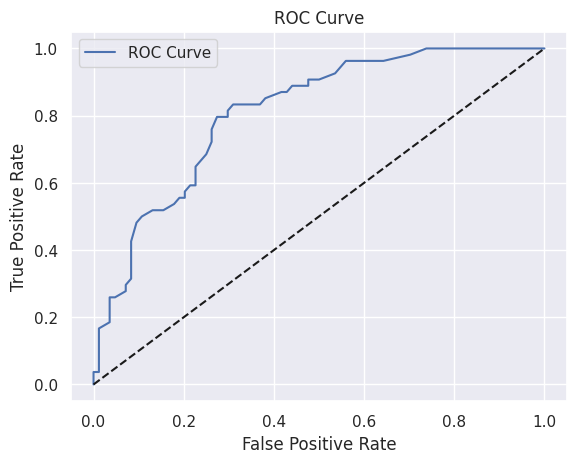

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
# Validation Set 에 대한 예측확률 계산
y_prob = model_2.predict_proba(X_test)[:,1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()